## iris 과제 - 임소영

### 데이터 로딩 및 전처리

In [729]:
# 샘플 데이터 관련 모듈
from sklearn.datasets import load_iris

# 데이터 준비 관련 모듈
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder    #데이테 라벨을 바꾸는거

# 학습 & 테스트용 데이터셋 준비 관련 모듈
from sklearn.model_selection import train_test_split

# 스케일링, 전처리 관련 모듈
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures

# 알고리즘 관련 모듈
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

# 성능평가 관련 모듈
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [730]:
file = load_iris()
file.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [731]:
data = file['data']
data = pd.DataFrame(data, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
data

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [732]:
target = file['target']
target = pd.Series(target, name = 'variety')
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int32

In [733]:
data['target'] = target
data

,sepal-length,sepal-width,petal-length,petal-width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [734]:
file['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [735]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [736]:
# 결측치
data.isna().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
target          0
dtype: int64

In [737]:
data.shape

(150, 5)

In [738]:
# 중복값 확인
data.duplicated().sum()

# 1개 존재하긴 하지만 삭제하지 않겠다.

1

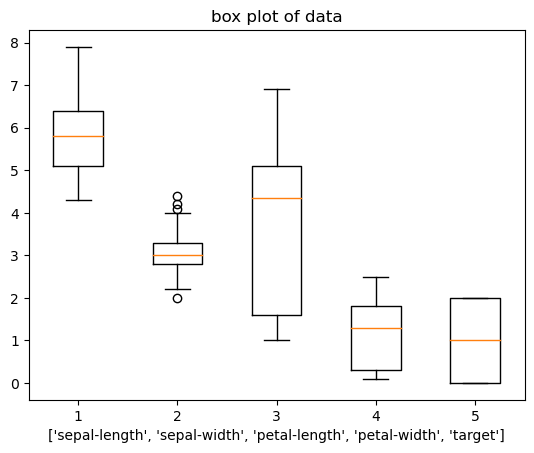

{'whiskers': [<matplotlib.lines.Line2D at 0x18f1d13f090>,
 'caps': [<matplotlib.lines.Line2D at 0x18f1c855f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f1c8561d0>,
 'medians': [<matplotlib.lines.Line2D at 0x18f1c838e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x18f1c838dd0>,
 'means': []}

In [739]:
# 이상치

from hamsu import visual_flier, print_flier
# 시각화로 이상치 확인
visual_flier(data)

In [740]:
lower, upper = print_flier(data)

[ q1 ] 
sepal-length    5.1
sepal-width     2.8
petal-length    1.6
petal-width     0.3
target          0.0
Name: 0.25, dtype: float64

[ q3 ] 
sepal-length    6.4
sepal-width     3.3
petal-length    5.1
petal-width     1.8
target          2.0
Name: 0.75, dtype: float64

[ iqr의 범위 ]
sepal-length    1.3
sepal-width     0.5
petal-length    3.5
petal-width     1.5
target          2.0
dtype: float64

------------------ 이상값이 될 기준 계산 ------------------

[ lower의 값 ]
sepal-length    3.15
sepal-width     2.05
petal-length   -3.65
petal-width    -1.95
target         -3.00
dtype: float64 

[ upper의 값 ]
sepal-length     8.35
sepal-width      4.05
petal-length    10.35
petal-width      4.05
target           5.00
dtype: float64

[ lower의 개수 ]
 sepal-length    0
sepal-width     1
petal-length    0
petal-width     0
target          0
dtype: int64

[ upper의 개수 ]
 sepal-length    0
sepal-width     3
petal-length    0
petal-width     0
target          0
dtype: int64


In [741]:
def drop_flier(insert_data, col_name):
    mask = insert_data[col_name] >= lower.loc[col_name]
    insert_data = insert_data[mask]
    print(f" '{col_name}' 컬럼에서 lower 미만의 값 제거 후 shape: {insert_data.shape}\n")
    
    mask2 = insert_data[col_name] <= upper.loc[col_name]
    insert_data = insert_data[mask2]
    print(f" '{col_name}' 컬럼에서 upper 초과의 값 제거 후 shape: {insert_data.shape}")
    
    return insert_data

In [742]:
data = drop_flier(data, 'sepal-width')

 'sepal-width' 컬럼에서 lower 미만의 값 제거 후 shape: (149, 5)

 'sepal-width' 컬럼에서 upper 초과의 값 제거 후 shape: (146, 5)


In [743]:
data.shape
# 이상치 제거 완료

(146, 5)

### 상관관계 분석

In [744]:
result = data.corr()
result = pd.DataFrame(result)
result

# 피쳐로 설정할 값 중에서 sepal-length, petal-length, petal-width 끼리 높은 상관관계를 보인다.

,sepal-length,sepal-width,petal-length,petal-width,target
sepal-length,1.000000,-0.123144,0.879362,0.822587,0.788053
sepal-width,-0.123144,1.000000,-0.406141,-0.340602,-0.405380
petal-length,0.879362,-0.406141,1.000000,0.961866,0.947460
petal-width,0.822587,-0.340602,0.961866,1.000000,0.955638
target,0.788053,-0.405380,0.947460,0.955638,1.000000


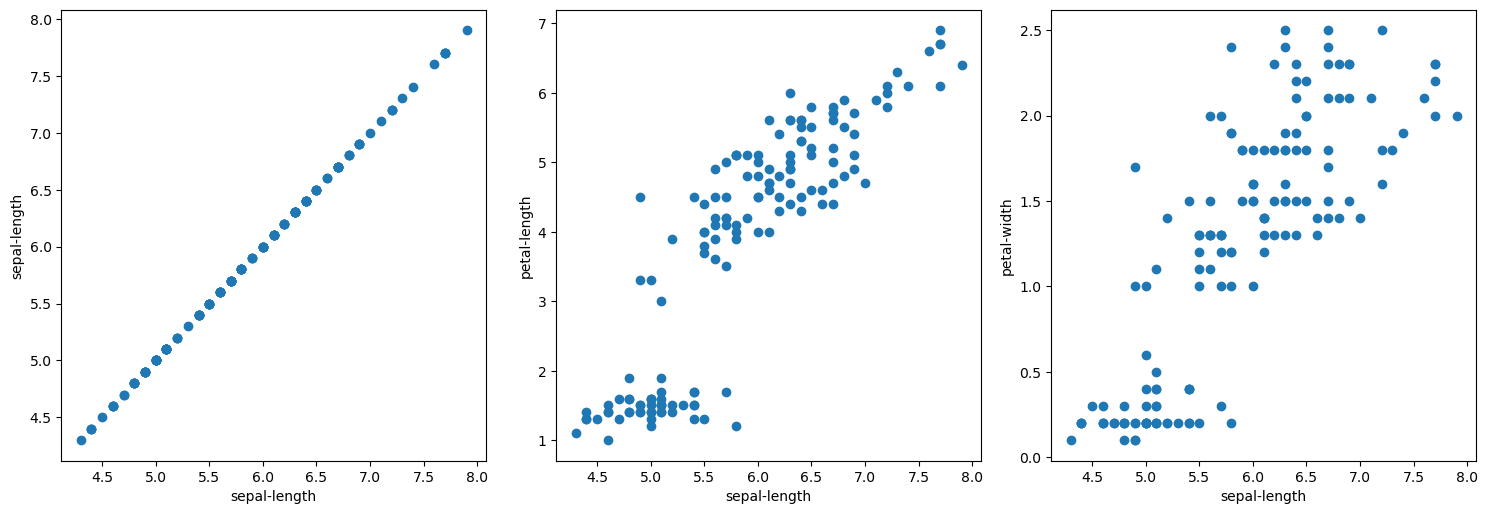

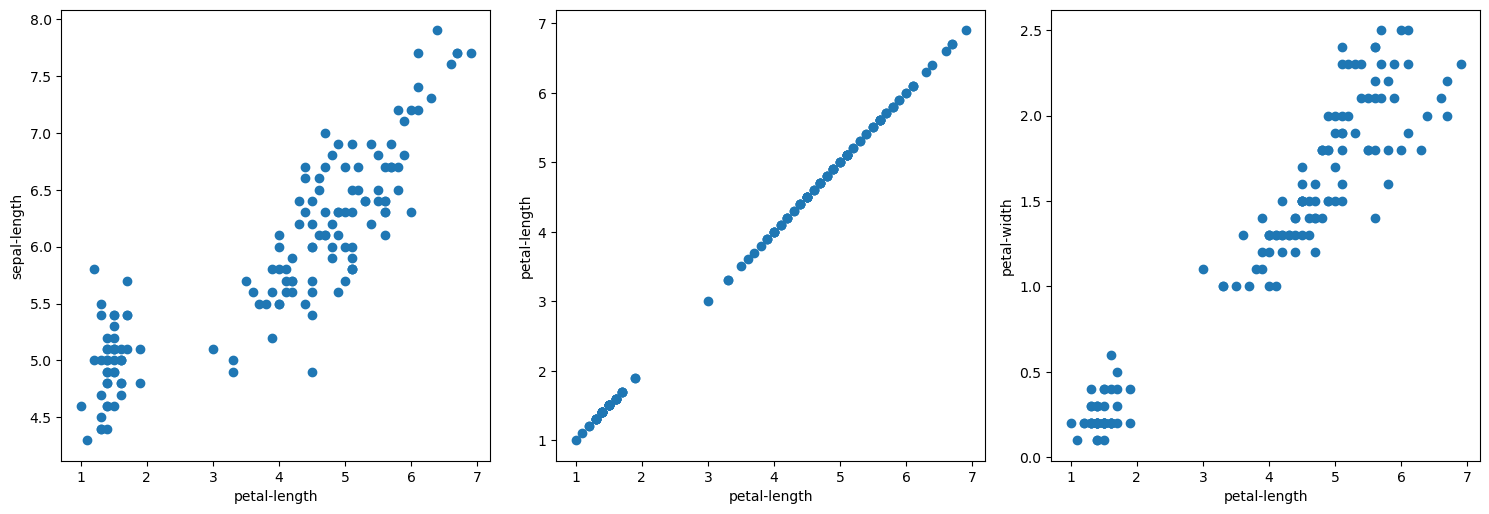

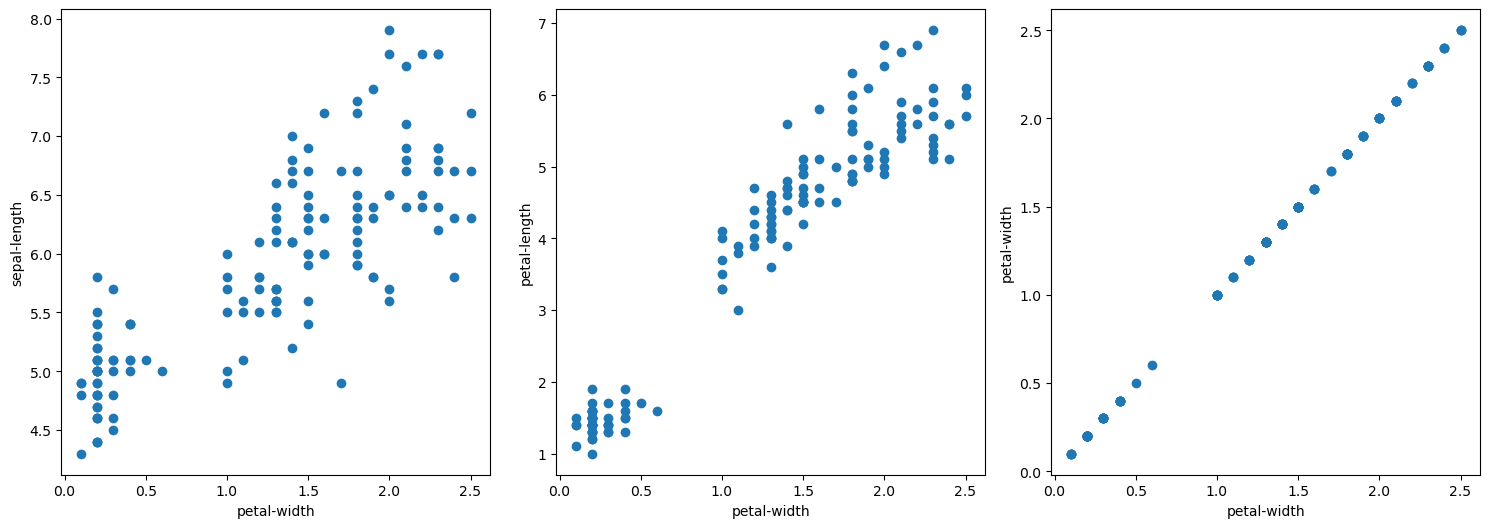

In [745]:
# 시각화로 확인해보자

col_list = ['sepal-length', 'petal-length', 'petal-width']

def print_only_features(col_list):
    j = 1
    for i in range(len(col_list)):
        plt.figure(figsize = (15, 15))
        
        for k in range(len(col_list)):
            plt.subplot(len(col_list), len(col_list), j)
            plt.scatter(data[col_list[i]], data[col_list[k]])
            plt.xlabel(col_list[i])
            plt.ylabel(col_list[k])
            j += 1
        plt.tight_layout()
        plt.show()
    
print_only_features(col_list)

# 시각화로 확인해보니 petal 간의 관계만 확인될 뿐이다. 그래서 피쳐를 petal-length, petal - width로 하기로 결정함!

### 피쳐, 타겟 데이터 분리

In [746]:
feature = data[['petal-length', 'petal-width']]
target = data['target']

In [747]:
print(f"feature =>  {feature.shape}")
print(f"target  =>  {target.shape}")

feature =>  (146, 2)
target  =>  (146,)


### 트레이닝용, 테스트용 분리

In [748]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 7, stratify = target)

# X 값들 먼저 & feature가 먼저라는 것을 잊지 말자

In [749]:
print(f"[훈련용] X_train =>  {X_train.shape}       y_train =>  {y_train.shape}")
print(f"[검증용] X_test =>  {X_test.shape}       y_test =>  {y_test.shape}")

[훈련용] X_train =>  (116, 2)       y_train =>  (116,)
[검증용] X_test =>  (30, 2)       y_test =>  (30,)


### 스케일링 - PolynomialFeatures

In [750]:
scale = PolynomialFeatures(include_bias=False, degree = 2)

In [751]:
result = scale.fit_transform(X_train)
scaled_X_train = pd.DataFrame(result, columns= scale.get_feature_names_out().tolist())
scaled_X_train

,petal-length,petal-width,petal-length^2,petal-length petal-width,petal-width^2
0,4.5,1.3,20.25,5.85,1.69
1,5.7,2.5,32.49,14.25,6.25
2,4.0,1.0,16.00,4.00,1.00
3,1.4,0.3,1.96,0.42,0.09
4,1.7,0.4,2.89,0.68,0.16
...,...,...,...,...,...
111,1.6,0.6,2.56,0.96,0.36
112,1.4,0.3,1.96,0.42,0.09
113,5.6,2.2,31.36,12.32,4.84
114,4.4,1.3,19.36,5.72,1.69


In [752]:
result = scale.fit_transform(X_test)
scaled_X_test = pd.DataFrame(result, columns= scale.get_feature_names_out().tolist())
scaled_X_test

,petal-length,petal-width,petal-length^2,petal-length petal-width,petal-width^2
0,4.7,1.4,22.09,6.58,1.96
1,1.4,0.2,1.96,0.28,0.04
2,5.6,1.8,31.36,10.08,3.24
3,4.9,1.8,24.01,8.82,3.24
4,5.1,2.3,26.01,11.73,5.29
5,3.5,1.0,12.25,3.50,1.00
6,5.8,1.6,33.64,9.28,2.56
7,1.6,0.2,2.56,0.32,0.04
8,4.1,1.3,16.81,5.33,1.69
9,1.5,0.2,2.25,0.30,0.04


### 학습 및 검정

In [753]:
model = KNeighborsClassifier()
model.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [754]:
model.score(scaled_X_train, y_train)

0.9568965517241379

In [755]:
model.score(scaled_X_test, y_test)

1.0

### 예측

In [756]:
y_pred = model.predict(scaled_X_test)
y_pred

array([1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 2,
       1, 2, 1, 1, 1, 1, 2, 2])

### 성능평가

- 정확도
- 정밀도
- 재현율
- F1 - score
- Confusion Matrics
- Classification Report

In [757]:
r2_score(y_test, y_pred)

1.0

In [758]:
mean_squared_error(y_test, y_pred)

0.0

In [759]:
mean_absolute_error(y_test, y_pred)

0.0

In [760]:
y_test_df = pd.DataFrame(y_test)
y_test_df.value_counts()

target
0         10
1         10
2         10
Name: count, dtype: int64

In [761]:
result = classification_report(y_test, y_pred, zero_division=0)
print(result)
# precision (정밀도) : 예측한 것 중 실제로 정답인 비율
# recall (재현율) : 실제로 정답인 것 중에서 모델이 정확히 예측한 비율
# F1-score : 정밀도와 재현율의 조화평균을 의미. 모델의 정확성과 완전성 사이의 균형을 측정
# support : 각 클래스에 속한 샘플의 수
# 0 = setosa , 1 = versicolor, 2 = virginica

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


In [762]:
f1_score(y_test, y_pred, average=None)

array([1., 1., 1.])